**1. Importing the libraries**

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**2. Loading the dataset**

In [33]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3. Selecting the relevant features for clustering**

In [34]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

**4. Standardizing the data**

In [35]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Data:")
print(X_scaled[:5])


Scaled Data:
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


**5. Elbow method to find the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

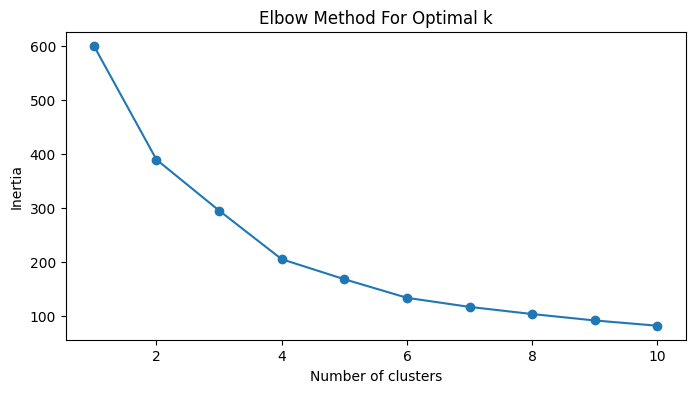

In [36]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


**6. Assuming optimal clusters k=3 (based on elbow method)**

In [37]:
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)
clusters = data['Cluster']

print("Clustered Data:")
print(data.head())

Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**7. Visualizing the clusters based on 'Annual Income' and 'Spending Score'**

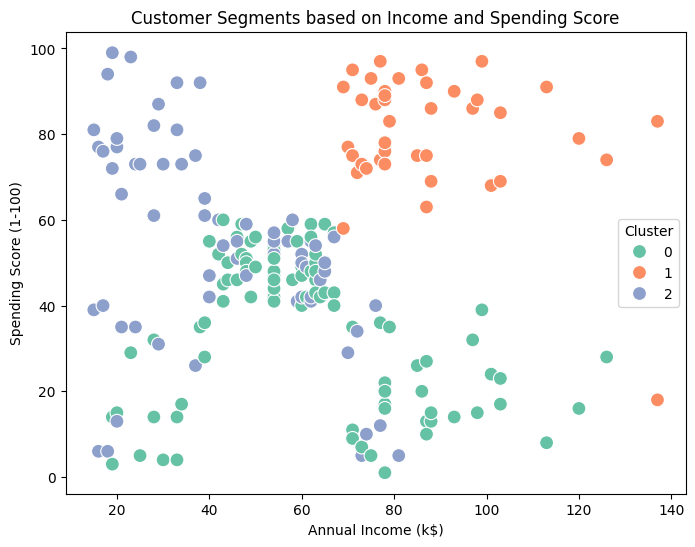

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**7. Visualizing the clusters based on 'Annual Income' and 'Spending Score' with their centroids**

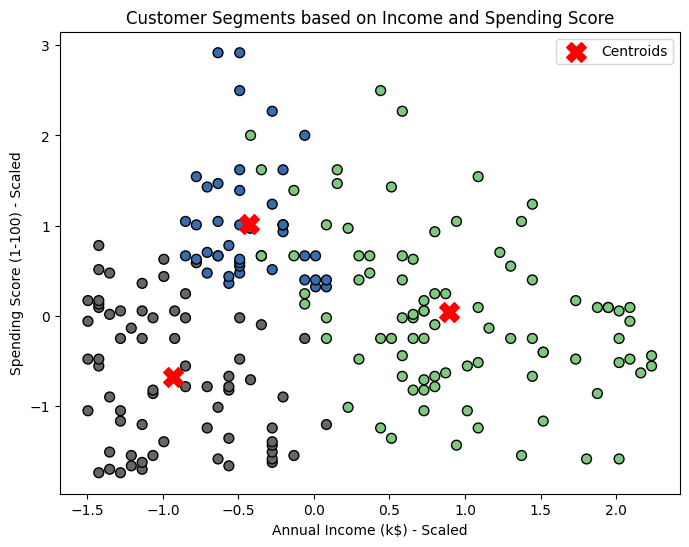

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Accent', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$) - Scaled')
plt.ylabel('Spending Score (1-100) - Scaled')
plt.legend()
plt.show()

# Testing new data

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is your original dataset and kmeans is the trained model
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# New data for testing
new_data = pd.DataFrame({
    'Age': [28, 35, 45],
    'Annual Income (k$)': [75, 100, 150],
    'Spending Score (1-100)': [50, 40, 70]
})

# Standardize the new data
new_data_scaled = scaler.transform(new_data)

# Predict the cluster
predicted_clusters = kmeans.predict(new_data_scaled)
new_data['Predicted Cluster'] = predicted_clusters

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate distances to cluster centers
distances = np.linalg.norm(new_data_scaled[:, np.newaxis] - cluster_centers, axis=2)
nearest_clusters = np.argmin(distances, axis=1)

# Add nearest cluster information
new_data['Nearest Cluster'] = nearest_clusters

# Print new data with predicted and nearest cluster
print(new_data)

   Age  Annual Income (k$)  Spending Score (1-100)  Predicted Cluster  \
0   28                  75                      50                  2   
1   35                 100                      40                  1   
2   45                 150                      70                  1   

   Nearest Cluster  
0                2  
1                1  
2                1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


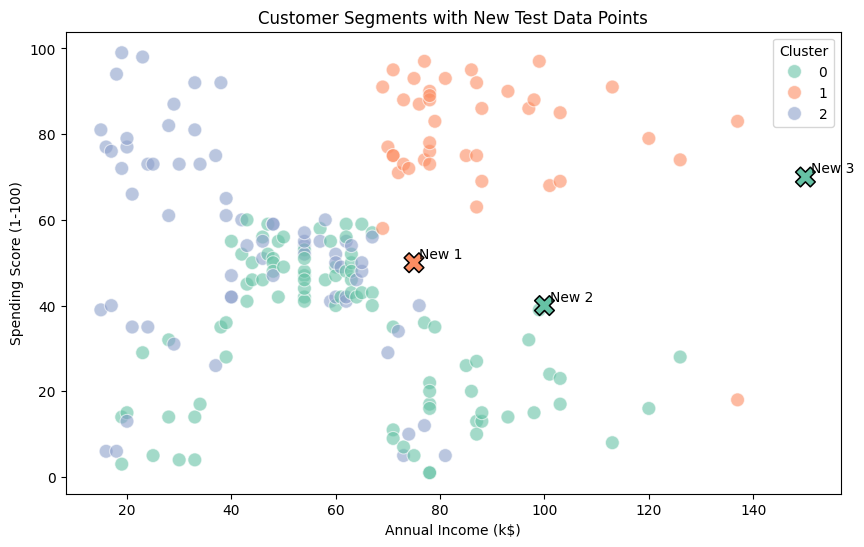

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the original data clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set2', s=100, alpha=0.6, edgecolor='w', legend="full")

# Plot the new test data points
sns.scatterplot(x=new_data['Annual Income (k$)'], y=new_data['Spending Score (1-100)'], hue=new_data['Predicted Cluster'], palette='Set2', s=200, marker='X', edgecolor='k', legend=False)

# Annotate the new data points for clarity (optional)
for i, row in new_data.iterrows():
    plt.text(row['Annual Income (k$)'] + 1, row['Spending Score (1-100)'] + 1, f'New {i+1}', color='black')

# Add title and labels
plt.title('Customer Segments with New Test Data Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
